## BUSINESS CASE:- BASED ON THE GIVEN DATA WE NEED TO PREDICT THE MODEL WHICH CLASSIFY THE THREE MAJOR ATTACKING DISEASES OF RICE PLANTS LIKE LEAF BLAST, BACTERIAL BLIGHT AND BROWN SPOT.

## IMPORT BASIC LIBRABRIES

In [1]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Input, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
import matplotlib.pyplot as plt
%matplotlib inline

# For split a data
#!pip install split-folders
import splitfolders
import random
import cv2
import os
from PIL import Image

# To supress a warning
import warnings
warnings.filterwarnings('ignore')

C:\Users\Hemant\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**1. BATERIAL LEAF BLIGHT:**
- Bacterial leaf blight is a common disease in plants caused by bacteria. It manifests as water-soaked lesions on leaves, which eventually turn brown. This disease affects various plants, including rice, causing damage to the crops.

**2. BROWN SPOT:**
- Brown spot is another plant disease characterized by the appearance of small, dark brown lesions on leaves. It is caused by a fungus and can affect a wide range of plants, including rice. Brown spot disease can lead to reduced yield and quality of crops.

**3.LEAF SMUT:**
- Leaf smut is a fungal disease that affects the leaves of plants, causing them to develop black spore masses. This disease can severely impact plant growth and reproduction, leading to significant agricultural losses.

## MAKE SUBSET OF TRAIN, TEST, VALIDATION

In [ ]:
!pip install split-folders

In [2]:
import splitfolders
splitfolders.ratio(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\Riceleafimages",
                  output='output',seed=1442,ratio=(0.8,0.1,0.1),group_prefix=None)

Copying files: 119 files [00:00, 348.41 files/s]


## DATA LOADING



In [3]:
training_set = r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train" # Training set
valdation_set  = r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\val"    # Validation set
testing_set = r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\test"   # Test set

### HERE THE DATASET IS PROPERLY LOADED, SPLITED AND ASSIGNED INTO VARIABLES SINCE IT HAS THREE CLASSES IT IS NOT BINARY TASK BUT IT IS A MULTICLASSIFICATION TASK.

#### THE DATASET HAS THREE CLASSES LABELED AS- 
* 'Bacterial leaf blight': 0,

* 'Brown spot': 1,

* 'Leaf smut': 2

#### THE OUTPUT FOLDER IN THE DRIVE WILL HAVE THE SUB-FOLDERS i. e

* test- the test will have sub-folder bacterial leaf blight,brown spot, leaf smut

* train- the train will have sub-folder bacterial leaf blight,brown spot, leaf smut

* val- the val will have sub-folder bacterial leaf blight,brown spot, leaf smut

## DATA AGUMENTATION

In [4]:
train_datagen=ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

val_datagen=ImageDataGenerator(rescale=(1./255),
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     fill_mode='nearest',
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=(1./255))




In [5]:
train_set=train_datagen.flow_from_directory(training_set,
                                            target_size=(256,256),
                                            batch_size=128,
                                            class_mode='categorical',
                                            color_mode='rgb')

val_set=val_datagen.flow_from_directory(valdation_set,
                                        target_size=(256,256),
                                        batch_size=128,
                                        class_mode='categorical',
                                        color_mode='rgb')

test_set=test_datagen.flow_from_directory(testing_set,
                                        target_size=(256,256),
                                        batch_size=128,
                                        class_mode='categorical',
                                        color_mode='rgb')



Found 95 images belonging to 3 classes.
Found 11 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


- Flow_from_directory takes the path to a directory & generates batches of augmented data.
- Here the color mode, batch size, target size and class mode are defined accordingly

## GET ALL CLASSES LABELS

In [6]:
train_set.class_indices

{'Bacterial leaf blight': 0, 'Brown spot': 1, 'Leaf smut': 2}

## VISUALISE IMAGES

In [7]:
import os # For folder path
import cv2 # For image visulisation
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Visualise first 10 images of each class
brown_spot = os.listdir(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Brown spot")
print("\nBrown Spot:",brown_spot[:10])

leaf_blight = os.listdir(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Bacterial leaf blight")
print("\nLeaf Blight:",leaf_blight[:10])

leaf_smut = os.listdir(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Leaf smut")
print("\nLeaf Smut: ",leaf_smut[:10])



Brown Spot: ['DSC_0100.jpg', 'DSC_0104.jpg', 'DSC_0105.jpg', 'DSC_0106.jpg', 'DSC_0107.jpg', 'DSC_0110.jpg', 'DSC_0111.jpg', 'DSC_0112.jpg', 'DSC_0113.jpg', 'DSC_0114.jpg']

Leaf Blight: ['DSC_0365.JPG', 'DSC_0367.JPG', 'DSC_0370.jpg', 'DSC_0372.JPG', 'DSC_0373.JPG', 'DSC_0376.JPG', 'DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0380.JPG']

Leaf Smut:  ['DSC_0293.JPG', 'DSC_0309.JPG', 'DSC_0310.JPG', 'DSC_0312.JPG', 'DSC_0313.JPG', 'DSC_0316.JPG', 'DSC_0317.JPG', 'DSC_0318.JPG', 'DSC_0319.jpg', 'DSC_0320.JPG']


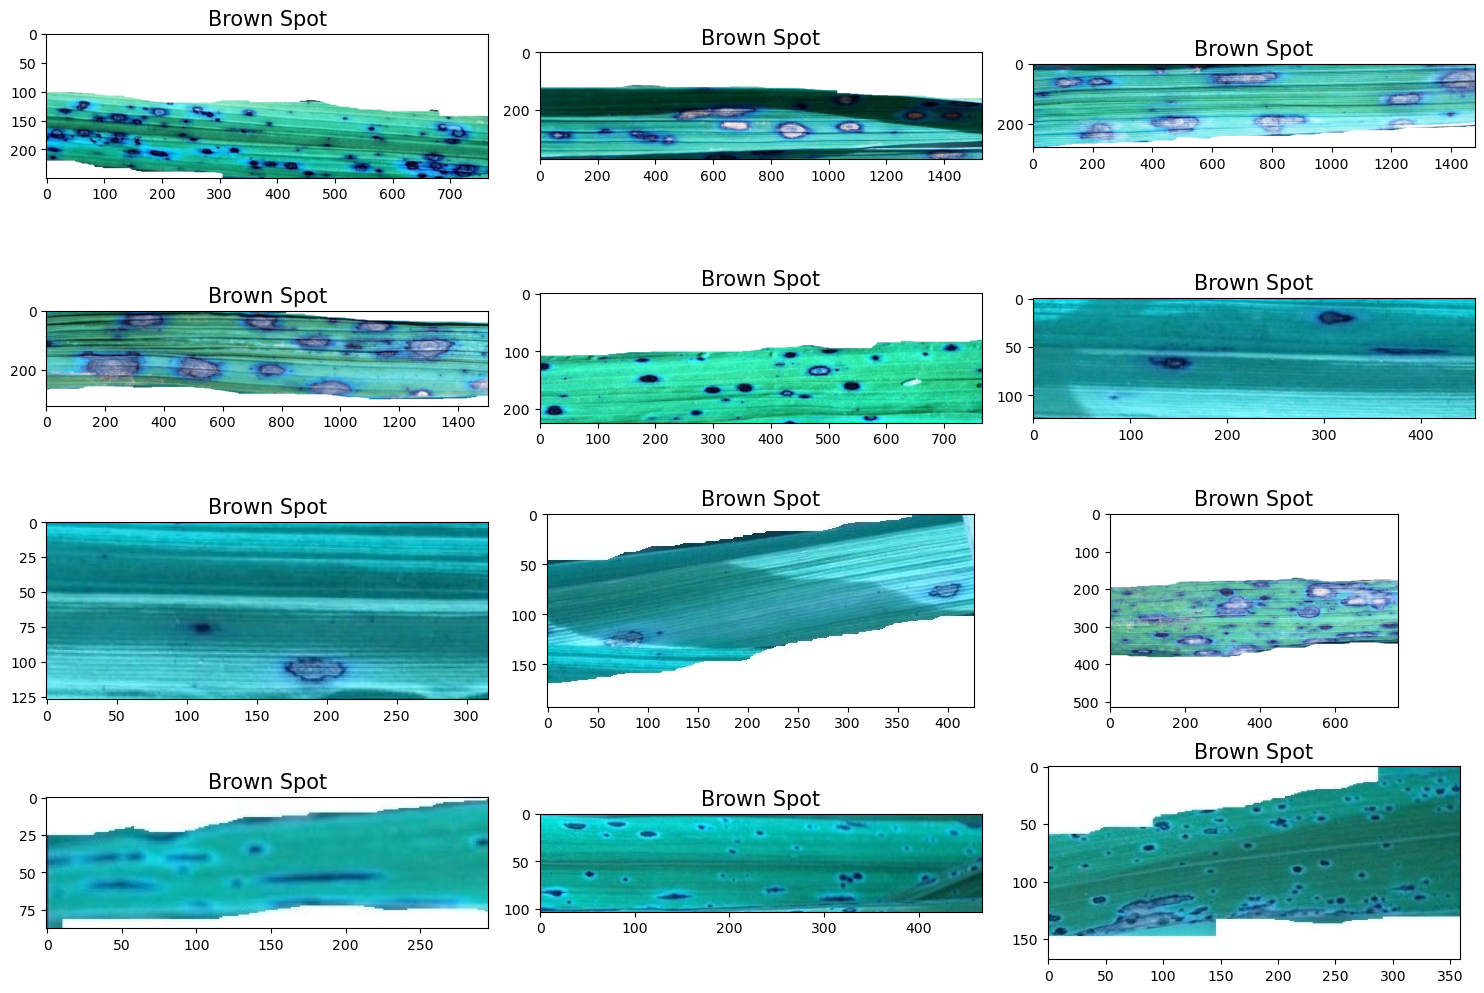

In [10]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Brown spot" + '/' + brown_spot[i])
    plt.imshow(img)
    plt.title('Brown Spot',fontsize=15)
plt.tight_layout()

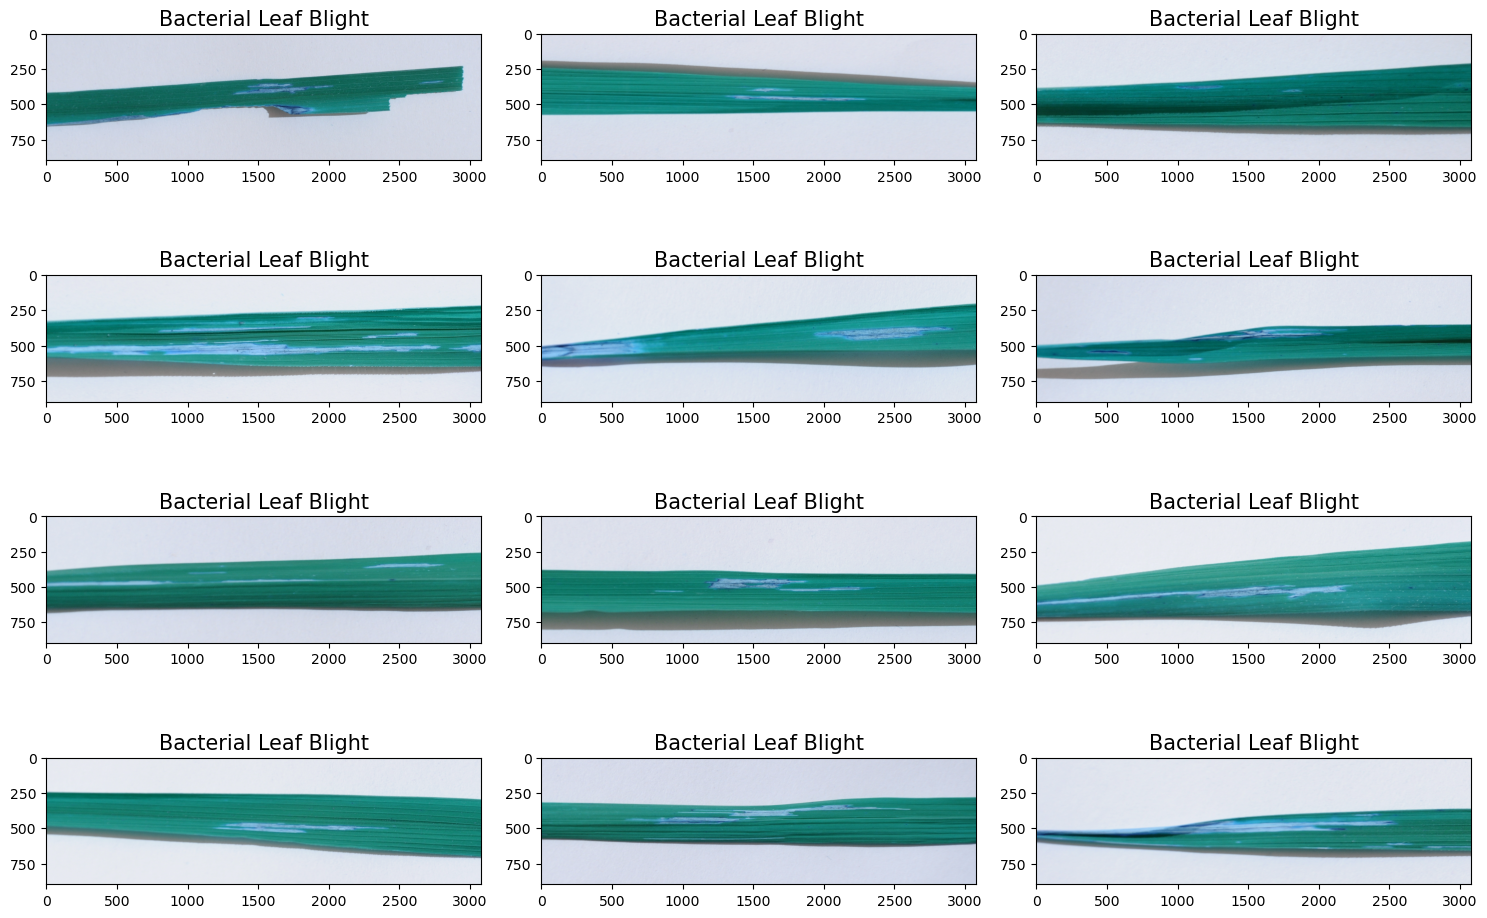

In [11]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Bacterial leaf blight" + '/' + leaf_blight[i])
    plt.imshow(img)
    plt.title('Bacterial Leaf Blight',fontsize=15)
plt.tight_layout()

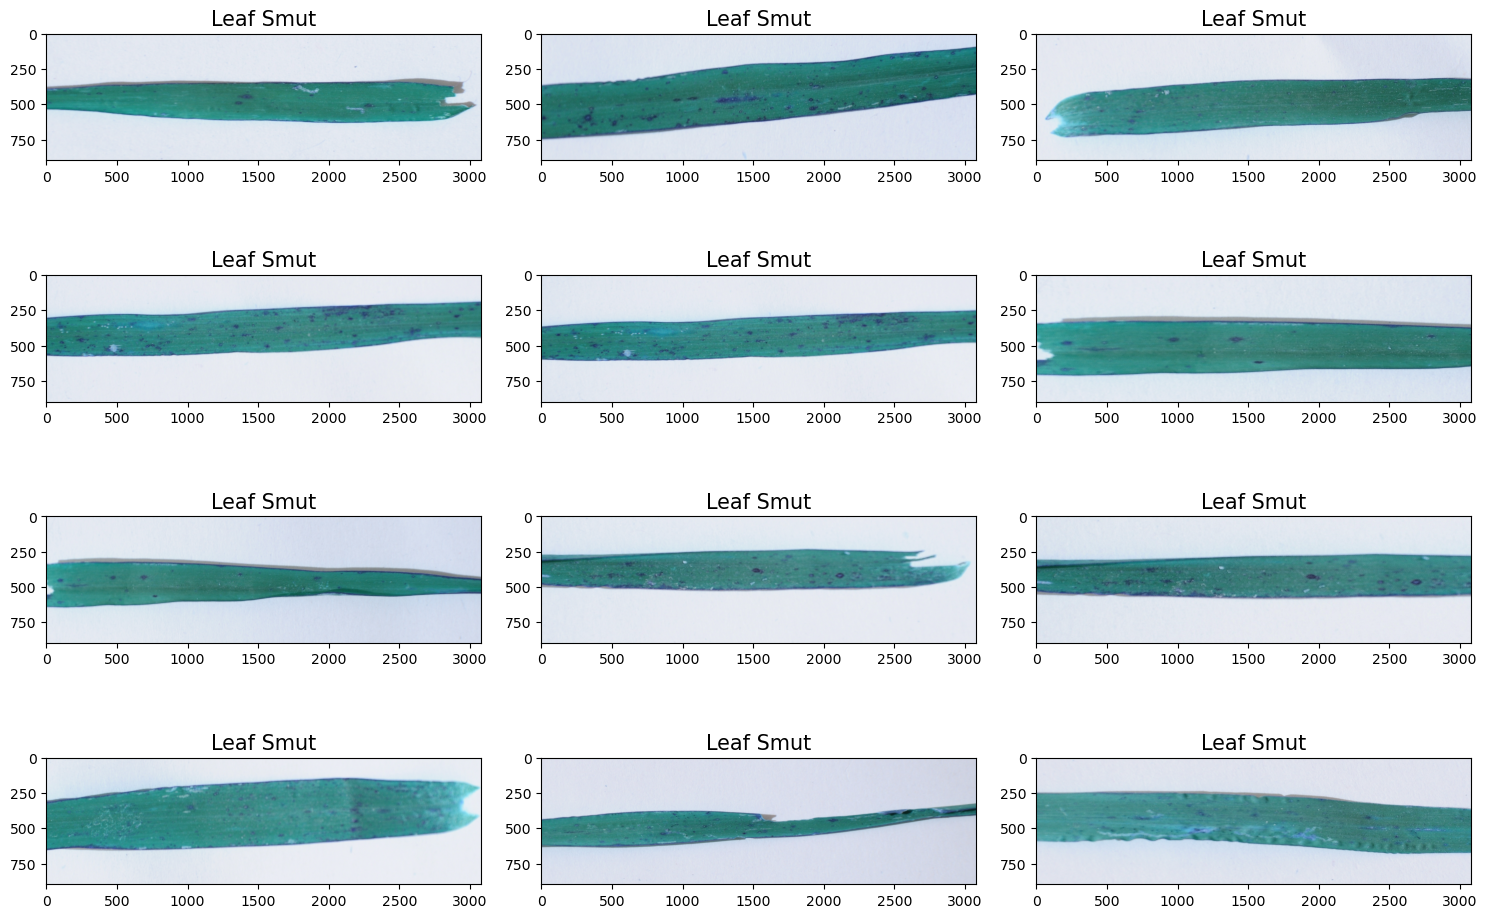

In [12]:
plt.figure(figsize=(15,10),facecolor='white')  #Set canvas size
for i in range(12):
    plt.subplot(4,3,i+1)
    img = cv2.imread(r"C:\Users\Hemant\Downloads\Internship Projects\PRCP-1001-RiceLeaf\output\train\Leaf smut" + '/' + leaf_smut[i])
    plt.imshow(img)
    plt.title('Leaf Smut',fontsize=15)
plt.tight_layout()

## MODEL BUILDING

In [13]:
model = Sequential() # Create a sequantial model

# First conv leyer along with max pool layer
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(256,256,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second conv layer along with max pool
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Third conv layer along with max pool
model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Fourt conv layer along with max pool
model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation= 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Use dropout to avoid overfitting problem of model
model.add(layers.Dropout(rate=0.5))

# Flatten the output/ Means convert 2D matix into 1D
model.add(layers.Flatten())

# Output layer along with softmax activation function beacuse of task is multiclass classification
model.add(layers.Dense(3, activation ='softmax'))

In [ ]:
!pip install visualkeras

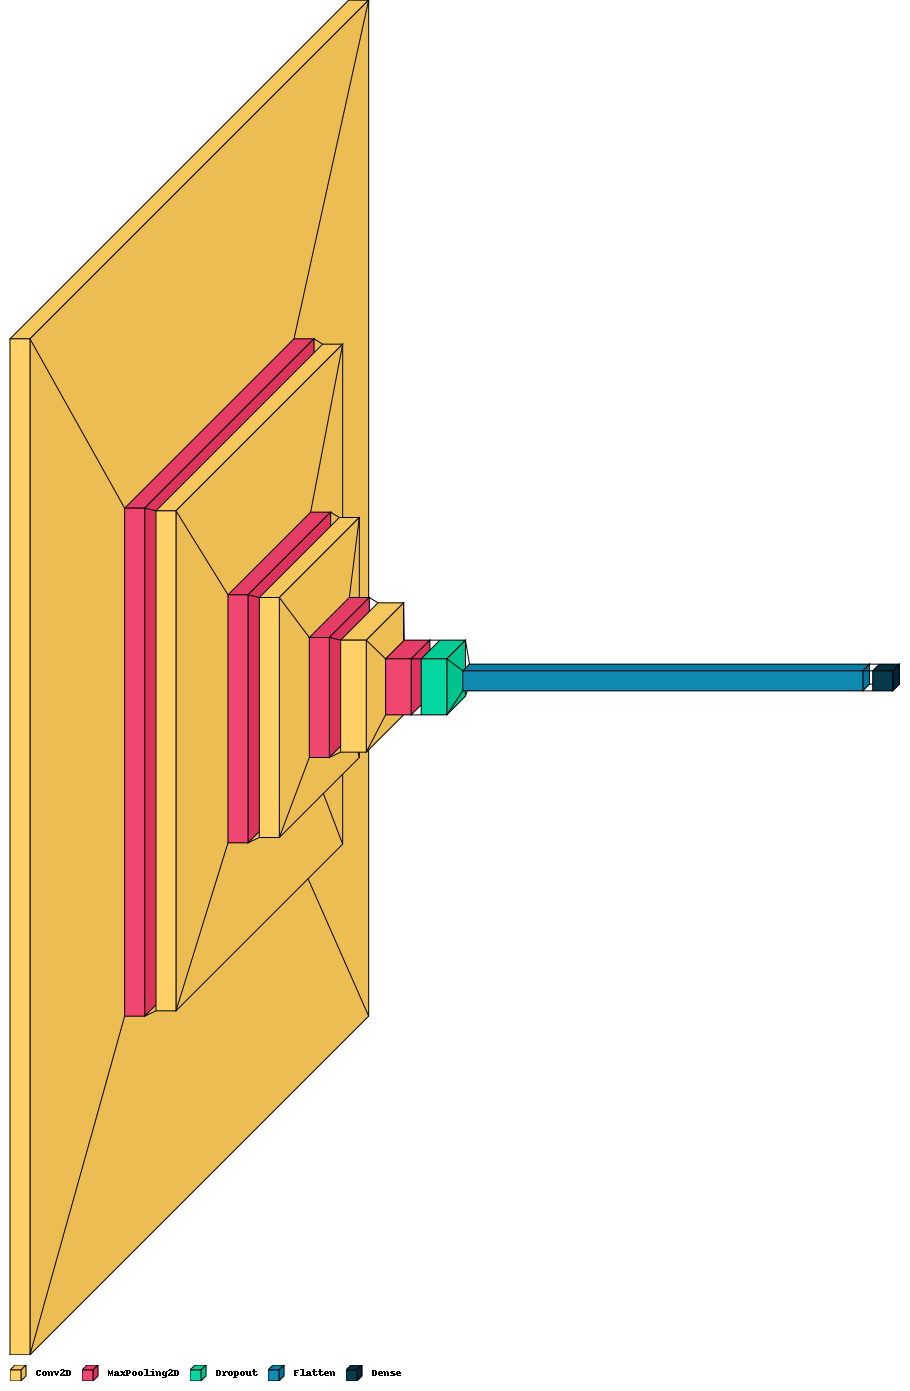

<Figure size 1500x1000 with 0 Axes>

In [14]:
plt.figure(figsize=(15,10),facecolor='white')
import visualkeras
visualkeras.layered_view(model,legend=True)

In [15]:
# Get model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

## COMPILE MODEL

In [16]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## FIT MODEL FOR TRAINING

In [17]:
# Fitting the data
hist = model.fit_generator(train_set, epochs=70, validation_data=val_set)

Epoch 1/70
1/1 [==============================] - 30s 30s/step - loss: 1.1007 - accuracy: 0.3474 - val_loss: 1.0760 - val_accuracy: 0.3636
Epoch 2/70
1/1 [==============================] - 21s 21s/step - loss: 1.0941 - accuracy: 0.3474 - val_loss: 1.0967 - val_accuracy: 0.4545
Epoch 3/70
1/1 [==============================] - 20s 20s/step - loss: 1.0970 - accuracy: 0.3684 - val_loss: 1.0187 - val_accuracy: 0.6364
Epoch 4/70
1/1 [==============================] - 25s 25s/step - loss: 1.0766 - accuracy: 0.4526 - val_loss: 0.9730 - val_accuracy: 0.6364
Epoch 5/70
1/1 [==============================] - 21s 21s/step - loss: 1.0529 - accuracy: 0.4842 - val_loss: 0.9455 - val_accuracy: 0.4545
Epoch 6/70
1/1 [==============================] - 22s 22s/step - loss: 1.0268 - accuracy: 0.5053 - val_loss: 0.8211 - val_accuracy: 0.6364
Epoch 7/70
1/1 [==============================] - 23s 23s/step - loss: 0.9959 - accuracy: 0.4842 - val_loss: 0.8857 - val_accuracy: 0.4545
Epoch 8/70
1/1 [===========

## PLOTTING THE TRAINING ACCURACY AND VALIDATION ACCURACY AND TRAINING LOSS AND VALIDATION LOSS

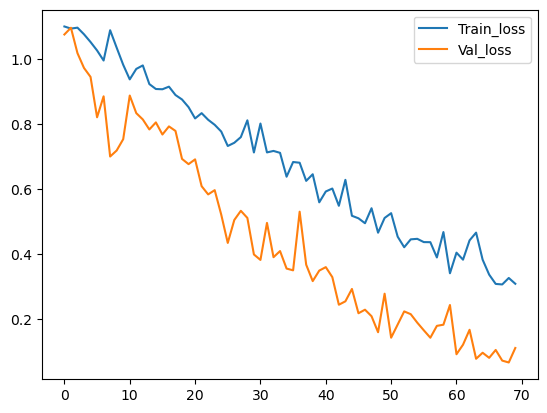

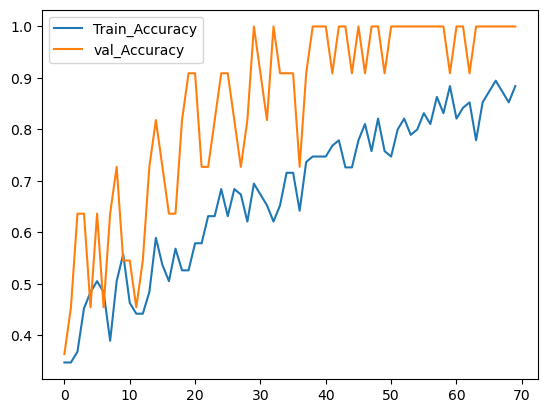

<Figure size 640x480 with 0 Axes>

In [18]:
# Training loss and validation loss
plt.plot(hist.history['loss'], label='Train_loss')
plt.plot(hist.history['val_loss'], label='Val_loss')
plt.legend()
plt.show()
plt.savefig('Loss_valLoss')


# Training accuracy and validation accuracy
plt.plot(hist.history['accuracy'], label='Train_Accuracy')
plt.plot(hist.history['val_accuracy'], label='val_Accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy_ValAccuracy')

## MODEL EVALUATION

In [19]:
train_result = model.evaluate(train_set)
print("Train Accuracy & Loss:",train_result)

test_result = model.evaluate(test_set)
print("Testing Accuracy & Loss",test_result)

1/1 [==============================] - 4s 4s/step - loss: 0.3053 - accuracy: 0.8526
Train Accuracy & Loss: [0.3053032457828522, 0.8526315689086914]
1/1 [==============================] - 1s 940ms/step - loss: 0.3437 - accuracy: 0.9231
Testing Accuracy & Loss [0.3436843156814575, 0.9230769276618958]


In [20]:
# Create a dataframe
import pandas as pd
data = pd.DataFrame(zip(train_result,test_result), columns=['Train','Test'],index=['Loss','Accuracy'])
data

Train      Test
Loss      0.305303  0.343684
Accuracy  0.852632  0.923077

## MODEL SAVING

In [21]:
model.save('CNN_MODEL.hdf5')

## PREDICTION ON TEST DATA

In [22]:
y_prediction = model.predict(test_set)
y_prediction

1/1 [==============================] - 3s 3s/step


array([[1.66294863e-04, 2.01008633e-01, 7.98825026e-01],
       [8.20112586e-01, 1.79886371e-01, 1.02636341e-06],
       [4.98812310e-02, 1.53373480e-01, 7.96745300e-01],
       [6.56950533e-01, 3.43046129e-01, 3.27551766e-06],
       [2.29137391e-03, 2.15258807e-01, 7.82449841e-01],
       [3.72617994e-03, 9.88566220e-01, 7.70766661e-03],
       [4.55353671e-07, 1.60413738e-02, 9.83958125e-01],
       [6.56382680e-01, 3.43602270e-01, 1.51072991e-05],
       [5.20200394e-02, 6.68571472e-01, 2.79408425e-01],
       [9.60782230e-01, 3.84747498e-02, 7.42943841e-04],
       [1.77601352e-03, 1.07217595e-01, 8.91006410e-01],
       [3.62003222e-02, 4.66721207e-01, 4.97078478e-01],
       [6.45882785e-02, 9.35411215e-01, 4.07590193e-07]], dtype=float32)

## LOAD MODEL

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/CNN_MODEL.hdf5")

### TEST IMAGE

1/1 [==============================] - 0s 23ms/step


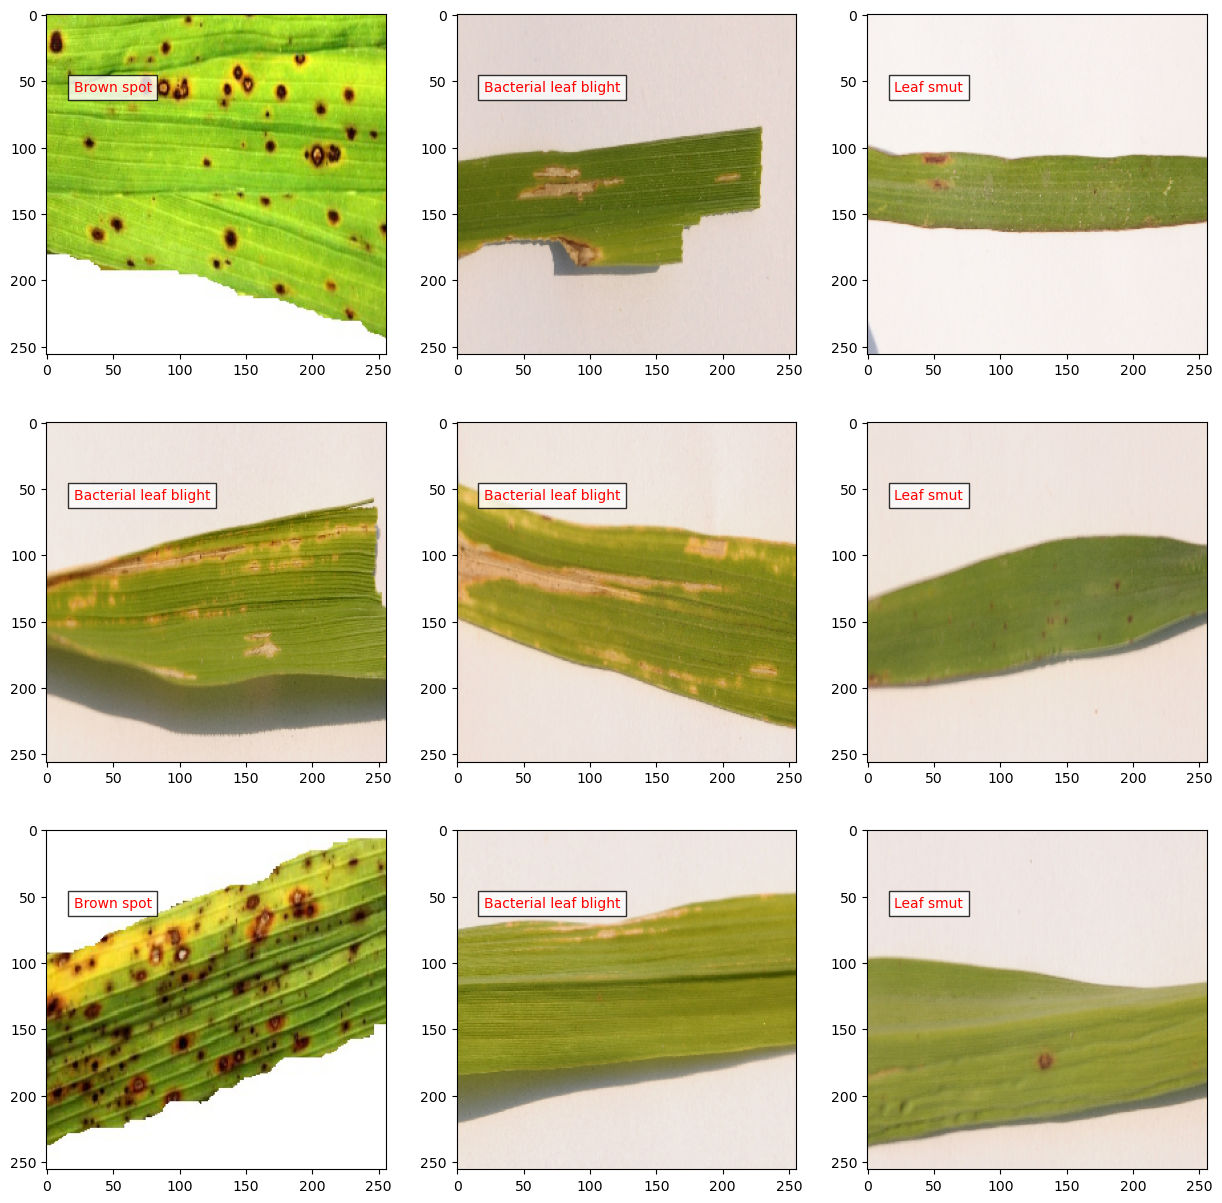

In [23]:
# Visualise the prediction of the model
# Make list of classes
class_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
imgs, labels = next(test_set)
fig =plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    img_t = np.expand_dims(imgs[i],axis=0)
    prediction = model.predict(img_t)
    idx = prediction[0].tolist().index(max(prediction[0]))
    plt.text(20,58, class_names[idx],color='red',fontsize=10,bbox=dict(facecolor='white',alpha=0.8))
    plt.imshow(imgs[i])


**NOTE-** CNN model is very well perfrom on testing side, but in training side model is slightly perfrom low and overfitting occurs.

**Conclusion and Future Work**
In this project, we have proposed a custom CNN-based model that can classifyﬁve common rice leaf diseases. Our model istrained to recognize the rice leaf diseases in diﬀerent image backgrounds andcapture conditions. Our model achieves 92% accuracy on independent testimages. 

-----------------------------------------------------------------------**THANK YOU**-----------------------------------------------------------------------